# PyTorch Fundamentals

## Tensors

Before we dive deep into the world of PyTorch development, it’s important to familiarize yourself with the fundamental data structure in PyTorch: the torch.tensor. By understanding the tensor, you will understand how PyTorch handles and stores data, and since deep learning is fundamentally the collection and manipulation of floating-point numbers, understanding tensors will help you understand how PyTorch implements more advanced functions for deep learning. In addition, you may find yourself using tensor operations frequently when preprocessing input data or manipulating output data during model development

In PyTorch, a tensor is a data structure used to store and manipulate data. Like a NumPy array, a tensor is a multidimensional array containing elements of a single data type. Tensors can be used to represent scalars, vectors, matrices, and n-dimensional arrays and are derived from the torch.Tensor class. However, tensors are more than just arrays of numbers. Creating or instantiating a tensor object from the torch.Tensor class gives us access to a set of built-in class attributes and operations or class methods that provide a robust set of built-in capabilities. This guide describes these attributes and operations in detail.

Tensors also include added benefits that make them more suitable than NumPy arrays for deep learning calculations. First, tensor operations can be performed significantly faster using GPU acceleration. Second, tensors can be stored and manipulated at scale using distributed processing on multiple CPUs and GPUs and across multiple servers. And third, tensors keep track of their graph computations, which is very important in implementing a deep learning library.

**Simple example**

First, we import the PyTorch library, then we create two tensors, x and y, from two-dimensional lists. Next, we add the two tensors and store the result in z. We can just use the + operator here because the torch.Tensor class supports operator overloading. Finally, we print the new tensor, z, which we can see is the matrix sum of x and y, and we print the size of z. Notice that z is a tensor object itself and the size() method is used to return its matrix dimensions, namely 2 × 3:

In [ ]:
import torch

x = torch.tensor([[1,2,3],[4,5,6]])
y = torch.tensor([[7,8,9],[10,11,12]])
z = x + y

In [ ]:
print(z)

tensor([[ 8, 10, 12],
        [14, 16, 18]])


In [ ]:
print(z.size())

torch.Size([2, 3])


In [ ]:
', '.join(dir(z))

'T, __abs__, __add__, __and__, __array__, __array_priority__, __array_wrap__, __bool__, __class__, __complex__, __contains__, __deepcopy__, __delattr__, __delitem__, __dict__, __dir__, __div__, __doc__, __eq__, __float__, __floordiv__, __format__, __ge__, __getattribute__, __getitem__, __gt__, __hash__, __iadd__, __iand__, __idiv__, __ifloordiv__, __ilshift__, __imod__, __imul__, __index__, __init__, __init_subclass__, __int__, __invert__, __ior__, __ipow__, __irshift__, __isub__, __iter__, __itruediv__, __ixor__, __le__, __len__, __long__, __lshift__, __lt__, __matmul__, __mod__, __module__, __mul__, __ne__, __neg__, __new__, __nonzero__, __or__, __pos__, __pow__, __radd__, __rdiv__, __reduce__, __reduce_ex__, __repr__, __reversed__, __rfloordiv__, __rmul__, __rpow__, __rshift__, __rsub__, __rtruediv__, __setattr__, __setitem__, __setstate__, __sizeof__, __str__, __sub__, __subclasshook__, __torch_function__, __truediv__, __weakref__, __xor__, _backward_hooks, _base, _cdata, _coalesce

**Running it on gpu (if available)**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

x = torch.tensor([[1,2,3],[4,5,6]],
                 device=device)
y = torch.tensor([[7,8,9],[10,11,12]],
                 device=device)
z = x + y

In [ ]:
print(z)

tensor([[ 8, 10, 12],
        [14, 16, 18]])


In [ ]:
print(z.size())

torch.Size([2, 3])


In [ ]:
print(z.device)

cpu


The previous section showed a simple way to create tensors; however, there are many other ways to do it. You can create tensors from preexisting numeric data or create random samplings. Tensors can be created from preexisting data stored in array-like structures such as lists, tuples, scalars, or serialized data files, as well as in NumPy arrays.

The following code illustrates some common ways to create tensors. First, it shows how to create a tensor from a list using torch.tensor(). This method can also be used to create tensors from other data structures like tuples, sets, or NumPy arrays:

In [ ]:
import numpy 

# Created from pre-existing arrays
w = torch.tensor([1,2,3]) # <1>
w = torch.tensor((1,2,3)) # <2>
w = torch.tensor(numpy.array([1,2,3])) # <3>

# Initialized by size
w = torch.empty(100,200) # <4>
w = torch.zeros(100,200) # <5>
w = torch.ones(100,200)  # <6>

# Initialized by size with random values
w = torch.rand(100,200)     # <7>
w = torch.randn(100,200)    # <8>
w = torch.randint(5,10,(100,200))  # <9> 

# Initialized with specified data type or device
w = torch.empty((100,200), dtype=torch.float64, 
                device="cpu")

# Initialized to have same size, data type, 
#   and device as another tensor
x = torch.empty_like(w)

1. from a list
2. from a tuple
3. from a numpy array
4. uninitialized, elements values are not predictable
5. all elements initialized with 0.0
6. all elements initialized with 1.0
7. creates a 100 x 200 tensor with elements from a uniform distribution on the interval [0, 1)
8. elements are random numbers from a normal distribution with mean 0 and variance 1
9. elements are random integers between 5 and 10

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]])

print(torch.empty_like(x))
print(torch.empty_like(x))
print(torch.zeros_like(x))
print(torch.ones_like(x))

print(torch.full_like(x, fill_value=5))

tensor([[94291637941632,              2,              3],
        [             4,              5,              6]])
tensor([[94291637941632,              2,              3],
        [             4,              5,              6]])
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[5, 5, 5],
        [5, 5, 5]])


Following table lists PyTorch functions used to create tensors. You should use each one with the torch namespace, e.g., torch.empty().

| Function | Description |
| -------- | ----------- |
| torch.tensor(data, dtype=None, device=None, <br /> requires_grad=False, pin_memory=False) | Creates a tensor from an existing data structure |
| torch.empty(*size, out=None, dtype=None, <br />layout=torch.strided, device=None, requires_grad=False) | Creates a tensor from uninitialized elements based on the random state of values in memory |
| torch.zeros(*size, out=None, dtype=None, <br />layout=torch.strided, device=None, requires_grad=False) | Creates a tensor with all elements initialized to 0.0 |
| torch.ones(*size, out=None, dtype=None, <br />layout=torch.strided, device=None, requires_grad=False) | Creates a tensor with all elements initialized to 1.0 |
| torch.arange(start=0, end, step=1, out=None, <br />dtype=None, layout=torch.strided, device=None, requires_grad=False) | Creates a 1D tensor of values over a range with a common step value |
| torch.linspace(start, end, steps=100, <br />out=None, dtype=None, layout=torch.strided, <br />device=None, requires_grad=False) | Creates a 1D tensor of linearly spaced points between the start and end |
| torch.logspace(start, end, steps=100, <br />base=10.0, out=None, dtype=None, <br />layout=torch.strided, device=None, requires_grad=False) | Creates a 1D tensor of logarithmically spaced points between the start and end |
| torch.eye(n, m=None, out=None, dtype=None, <br />layout=torch.strided, device=None, requires_grad=False) | Creates a 2D tensor with ones on the diagonal and zeros everywhere else |
| torch.full(size, fill_value, out=None, <br />dtype=None, layout=torch.strided, device=None, requires_grad=False) | Creates a tensor filled with fill_value |
| torch.load(f) | Loads a tensor from a serialized pickle file |
| torch.save(f) | Saves a tensor to a serialized pickle file |

During deep learning development, it’s important to be aware of the data type used by your data and its calculations. So when you create tensors, you should control what data types are being used. As mentioned previously, all tensor elements have the same data type. You can specify the data type when creating the tensor by using the dtype parameter, or you can cast a tensor to a new dtype using the appropriate casting method or the to() method, as shown in the following code:

In [ ]:
# Specify data type at creation using dtype
w = torch.tensor([1,2,3], dtype=torch.float32)

# Use casting method to cast to a new data type
w.int()       # w remains a float32 after cast
w = w.int()   # w changes to int32 after cast

# Use to() method to cast to a new type
w = w.to(torch.float64) # <1>
w = w.to(dtype=torch.float64) # <2>

# Python automatically converts data types during operations
x = torch.tensor([1,2,3], dtype=torch.int32)
y = torch.tensor([1,2,3], dtype=torch.float32)
z = x + y # <3>
print(z.dtype)

torch.float32


Table below lists all the available data types in PyTorch. Each data type results in a different tensor class depending on the tensor’s device. The corresponding tensor classes are shown in the two rightmost columns for CPUs and GPUs, respectively.

| Data type | dtype | CPU tensor | GPU tensor |
| --------- | ----- | ---------- | ---------- |
| 32-bit floating point (default) | torch.float32 or torch.float | torch.​​Float⁠Ten⁠sor | torch.cuda.​Float⁠Tensor |
| 64-bit floating point | torch.float64 or torch.dou⁠ble | torch.​​Dou⁠ble⁠Tensor | torch.cuda.​​Dou⁠bleTensor |
| 16-bit floating point | torch.float16 or torch.half | torch.​Half⁠Tensor | torch.cuda.​Half⁠Tensor |
| 8-bit integer (unsigned) | torch.uint8 | torch.​Byte⁠Tensor | torch.cuda.​Byte⁠Tensor |
| 8-bit integer (signed) | torch.int8 | torch.​Char⁠Tensor | torch.cuda.​Char⁠Tensor |
| 16-bit integer (signed) | torch.int16 or torch.short | torch.​Short⁠Tensor | torch.cuda.​Short⁠Tensor |
| 32-bit integer (signed) | torch.int32 or torch.int | torch.​IntTen⁠sor | torch.cuda.​IntTen⁠sor |
| 64-bit integer (signed) | torch.int64 or torch.long | torch.​Long⁠Tensor | torch.cuda.​Long⁠Tensor |
| Boolean | torch.bool | torch.​Bool⁠Tensor | torch.cuda.​Bool⁠Tensor |

**Indexing, Slicing, Combining, and Splitting Tensors**

Once you have created tensors, you may want to access portions of the data and combine or split tensors to form new tensors. The following code demonstrates how to perform these types of operations. You can slice and index tensors in the same way you would slice and index NumPy arrays.

In [ ]:
x = torch.tensor([[1,2],[3,4],[5,6],[7,8]])
x

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
# Indexing, returns a tensor
print(x[1,1])

tensor(4)


In [ ]:
# Indexing, returns a value as a Python number
print(x[1,1].item())

4


In [ ]:
# Slicing
print(x[:2,1])

tensor([2, 4])


In [ ]:
# Boolean indexing
# Only keep elements less than 5
print(x[x<5])

tensor([1, 2, 3, 4])


In [ ]:
# Transpose array; x.t() or x.T can be used
print(x.t())

tensor([[1, 3, 5, 7],
        [2, 4, 6, 8]])


In [ ]:
# Change shape; usually view() is preferred over
# reshape()
print(x.view((2,4)))

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


You can also combine or split tensors by using functions like torch.stack() and torch.unbind(), respectively, as shown in the following code:

In [ ]:
# Combining tensors
y = torch.stack((x, x))
print(y)

tensor([[[1, 2],
         [3, 4],
         [5, 6],
         [7, 8]],

        [[1, 2],
         [3, 4],
         [5, 6],
         [7, 8]]])


In [ ]:
x

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
# Splitting tensors
a,b = x.unbind(dim=1)
print(a,b)

tensor([1, 3, 5, 7]) tensor([2, 4, 6, 8])


In [ ]:
# Splitting tensors
a,b,c,d = x.unbind(dim=0)
print(a,b,c,d)

tensor([1, 2]) tensor([3, 4]) tensor([5, 6]) tensor([7, 8])


PyTorch provides a robust set of built-in functions that can be used to access, split, and combine tensors in different ways. Table below lists some commonly used functions to manipulate tensor elements.

| Function | Description |
| -------- | ----------- |
| torch.**cat**() | Concatenates the given sequence of tensors in the given dimension. |
| torch.**chunk**() | Splits a tensor into a specific number of chunks. Each chunk is a view of the input tensor. |
| torch.**gather**() | Gathers values along an axis specified by the dimension. |
| torch.**index\_select**() | Returns a new tensor that indexes the input tensor along a dimension using the entries in the index, which is a LongTensor. |
| torch.**masked\_select**() | Returns a new 1D tensor that indexes the input tensor according to the Boolean mask, which is a BoolTensor. |
| torch.**narrow**() | Returns a tensor that is a narrow version of the input tensor. |
| torch.**nonzero**() | Returns the indices of nonzero elements. |
| torch.**reshape**() | Returns a tensor with the same data and number of elements as the input tensor, but a different shape. </br>Use view() instead to ensure the tensor is not copied. |
| torch.**split**() | Splits the tensor into chunks. Each chunk is a view or subdivision of the original tensor. |
| torch.**squeeze**() | Returns a tensor with all the dimensions of the input tensor of size 1 removed. |
| torch.**stack**() | Concatenates a sequence of tensors along a new dimension. |
| torch.**t**() | Expects the input to be a 2D tensor and transposes dimensions 0 and 1. |
| torch.**take**() | Returns a tensor at specified indices when slicing is not continuous. |
| torch.**transpose**() | Transposes only the specified dimensions. |
| torch.**unbind**() | Removes a tensor dimension by returning a tuple of the removed dimension. |
| torch.**unsqueeze**() | Returns a new tensor with a dimension of size 1 inserted at the specified position. |
| torch.**where**() | Returns a tensor of selected elements from either one of two tensors, depending on the specified condition. |

Deep learning development is strongly based on mathematical computations, so PyTorch supports a very robust set of built-in math functions. Whether you are creating new data transforms, customizing loss functions, or building your own optimization algorithms, you can speed up your research and development with the math functions provided by PyTorch.

PyTorch supports many different types of math functions, including pointwise operations, reduction functions, comparison calculations, and linear algebra operations, as well as spectral and other math computations. The first category of useful math operations we’ll look at are pointwise operations. Pointwise operations perform an operation on each point in the tensor individually and return a new tensor.

They are useful for rounding and truncation as well as trigonometrical and logical operations. By default, the functions will create a new tensor or use one passed in by the out parameter. If you want to perform an in-place operation, remember to append an underscore to the function name.

Table below lists some commonly used pointwise operations.

| Operation type | Sample functions |
| -------------- | ---------------- |
| Basic math | add(), div(), mul(), neg(), reciprocal(), true\_divide() |
| Truncation | ceil(), clamp(), floor(), floor\_divide(), fmod(), frac(), lerp(), remainder(), round(), sigmoid(), trunc() |
| Complex numbers | abs(), angle(), conj(), imag(), real() |
| Trigonometry | acos(), asin(), atan(), cos(), cosh(), deg2rad(), rad2deg(), sin(), sinh(), tan(), tanh() |
| Exponents and logarithms | exp(), expm1(), log(), log10(), log1p(), log2(), logaddexp(), pow(), rsqrt(), sqrt(), square() |
| Logical | logical\_and(), logical\_not(), logical\_or(), logical\_xor() |
| Cumulative math | addcdiv(), addcmul() |
| Bitwise operators | bitwise\_not(), bitwise\_and(), bitwise\_or(), bitwise\_xor() |
| Error functions | erf(), erfc(), erfinv() |
| Gamma functions | digamma(), lgamma(), mvlgamma(), polygamma() |

The second category of math functions we’ll look at are reduction operations. Reduction operations reduce a bunch of numbers down to a single number or a smaller set of numbers. That is, they reduce the dimensionality or rank of the tensor. Reduction operations include functions for finding maximum or minimum values as well as many statistical calculations, like finding the mean or standard deviation.

These operations are frequently used in deep learning. For example, deep learning classification often uses the argmax() function to reduce softmax outputs to a dominant class.

| Function | Description |
| -------- | ----------- |
| torch.**argmax**(_input, dim, keepdim=False, out=None_) | Returns the index(es) of the maximum value across all elements, or just a dimension if it’s specified |
| torch.**argmin**(_input, dim, keepdim=False, out=None_) | Returns the index(es) of the minimum value across all elements, or just a dimension if it’s specified |
| torch.**dist**(_input, dim, keepdim=False, out=None_) | Computes the _p_\-norm of two tensors |
| torch.**logsumexp**(_input, dim, keepdim=False, out=None_) | Computes the log of summed exponentials of each row of the input tensor in the given dimension |
| torch.**mean**(_input, dim, keepdim=False, out=None_) | Computes the mean or average across all elements, or just a dimension if it’s specified |
| torch.**median**(_input, dim, keepdim=False, out=None_) | Computes the median or middle value across all elements, or just a dimension if it’s specified |
| torch.**mode**(_input, dim, keepdim=False, out=None_) | Computes the mode or most frequent value across all elements, or just a dimension if it’s specified |
| torch.**norm**(_input, p='fro', dim=None,__keepdim=False,__out=None, dtype=None_) | Computes the matrix or vector norm across all elements, or just a dimension if it’s specified |
| torch.**prod**(_input, dim, keepdim=False, dtype=None_) | Computes the product of all elements, or of each row of the input tensor if it’s specified |
| torch.**std**(_input, dim, keepdim=False, out=None_) | Computes the standard deviation across all elements, or just a dimension if it’s specified |
| torch.**std\_mean**(_input, unbiased=True_) | Computes the standard deviation and mean across all elements, or just a dimension if it’s specified |
| torch.**sum**(_input, dim, keepdim=False, out=None_) | Computes the sum of all elements, or just a dimension if it’s specified |
| torch.**unique**(_input, dim, keepdim=False, out=None_) | Removes duplicates across the entire tensor, or just a dimension if it’s specified |
| torch.unique\_​consecutive(_input, dim, keepdim=False, out=None_) | Similar to torch.unique() but only removes consecutive duplicates |
| torch.**var**(_input, dim, keepdim=False, out=None_) | Computes the variance across all elements, or just a dimension if it’s specified |
| torch.**var\_mean**(_input, dim, keepdim=False, out=None_) | Computes the mean and variance across all elements, or just a dimension if it’s specified |

Note that many of these functions accept the dim parameter, which specifies the dimension of reduction for multidimensional tensors. This is similar to the axis parameter in NumPy. By default, when dim is not specified, the reduction occurs across all dimensions. Specifying dim = 1 will compute the operation across each row. For example, torch.mean(x,1) will compute the mean for each row in tensor x.

> Tip: It’s common to chain methods together. For example, torch.rand(2,2).max().item() creates a 2 × 2 tensor of random floats, finds the maximum value, and returns the value itself from the resulting tensor.

Next, we’ll look at PyTorch’s comparison functions. Comparison functions usually compare all the values within a tensor, or compare one tensor’s values to another’s. They can return a tensor full of Booleans based on each element’s value such as torch.eq() or torch.is_boolean(). There are also functions to find the maximum or minimum value, sort tensor values, return the top subset of tensor elements, and more.

Table below lists some commonly used comparison functions for your reference.

| Operation type | Sample functions |
| -------------- | ---------------- |
| Compare a tensor to other tensors | eq(), ge(), gt(), le(), lt(), ne() or \==, \>, \>=, <, <=, !=, respectively |
| Test tensor status or conditions | isclose(), isfinite(), isinf(), isnan() |
| Return a single Boolean for the entire tensor | allclose(), equal() |
| Find value(s) over the entire tensor or along a given dimension | argsort(), kthvalue(), max(), min(), sort(), topk() |

The next type of mathematical functions we’ll look at are linear algebra functions. Linear algebra functions facilitate matrix operations and are important for deep learning computations.

Many computations, including gradient descent and optimization algorithms, use linear algebra to implement their calculations. PyTorch supports a robust set of built-in linear algebra operations, many of which are based on the Basic Linear Algebra Subprograms (BLAS) and Linear Algebra Package (LAPACK) standardized libraries.

| Function | Description |
| -------- | ----------- |
| torch.**matmul**() | Computes a matrix product of two tensors; supports broadcasting |
| torch.**chain\_matmul**() | Computes a matrix product of _N_ tensors |
| torch.**mm**() | Computes a matrix product of two tensors (if broadcasting is required, use matmul()) |
| torch.**addmm**() | Computes a matrix product of two tensors and adds it to the input |
| torch.**bmm**() | Computes a batch of matrix products |
| torch.**addbmm**() | Computes a batch of matrix products and adds it to the input |
| torch.**baddbmm**() | Computes a batch of matrix products and adds it to the input batch |
| torch.**mv**() | Computes the product of the matrix and vector |
| torch.**addmv**() | Computes the product of the matrix and vector and adds it to the input |
| torch.**matrix\_power** | Returns a tensor raised to the power of _n_ (for square tensors) |
| torch.**eig**() | Finds the eigenvalues and eigenvectors of a real square tensor |
| torch.**inverse**() | Computes the inverse of a square tensor |
| torch.**det**() | Computes the determinant of a matrix or batch of matrices |
| torch.**logdet**() | Computes the log determinant of a matrix or batch of matrices |
| torch.**dot**() | Computes the inner product of two tensors |
| torch.**addr**() | Computes the outer product of two tensors and adds it to the input |
| torch.**solve**() | Returns the solution to a system of linear equations |
| torch.**svd**() | Performs a single-value decomposition |
| torch.**pca\_lowrank**() | Performs a linear principle component analysis |
| torch.**cholesky**() | Computes a Cholesky decomposition |
| torch.**cholesky\_inverse**() | Computes the inverse of a symmetric positive definite matrix and returns the Cholesky factor |
| torch.**cholesky\_solve**() | Solves a system of linear equations using the Cholesky factor |

The final type of mathematical operations we’ll consider are spectral and other math operations. Depending on the domain of interest, these functions may be useful for data transforms or analysis. For example, spectral operations like the fast Fourier transform (FFT) can play an important role in computer vision or digital signal processing applications.

| Operation type | Sample functions |
| -------------- | ---------------- |
| Fast, inverse, and short-time Fourier transforms | fft(), ifft(), stft() |
| Real-to-complex FFT and complex-to-real inverse FFT (IFFT) | rfft(), irfft() |
| Windowing algorithms | bartlett\_window(), blackman\_window(),hamming\_window(), hann\_window() |
| Histogram and bin counts | histc(), bincount() |
| Cumulative operations | cummax(), cummin(), cumprod(), cumsum(),trace() (sum of the diagonal), </br> einsum() (sum of products using Einstein summation) |
| Normalization functions | cdist(), renorm() |
| Cross product, dot product, and Cartesian product | cross(), tensordot(), cartesian\_prod() |
| Functions that create a diagonal tensor with elements of the input tensor | diag(), diag\_embed(), diag\_flat(), diagonal() |
| Einstein summation | einsum() |
| Matrix reduction and restructuring functions | flatten(), flip(), rot90(), repeat\_interleave(), meshgrid(), roll(), combinations() |
| Functions that return the lower or upper triangles and their indices | tril(), tril\_indices, triu(), triu\_indices() |

One function, backward(), is worth calling out in its own subsection because it’s what makes PyTorch so powerful for deep learning development. The backward() function uses PyTorch’s automatic differentiation package, torch.autograd, to differentiate and compute gradients of tensors based on the chain rule.

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]], 
         dtype=torch.float, requires_grad=True)
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)


In [ ]:
f = x.pow(2).sum()
print(f)

tensor(91., grad_fn=<SumBackward0>)


In [ ]:
f.backward()
print(x.grad) # df/dx = 2x

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])


## Gradient Descent

we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

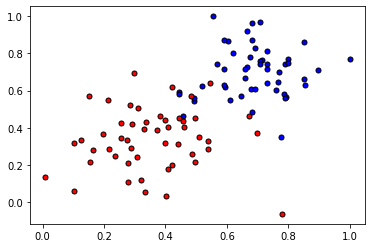

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-neural-networks/gradient-descent/data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [ ]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

The following training function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [ ]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5
            
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469987
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


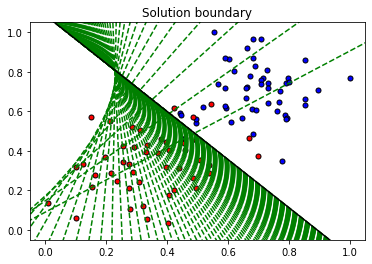

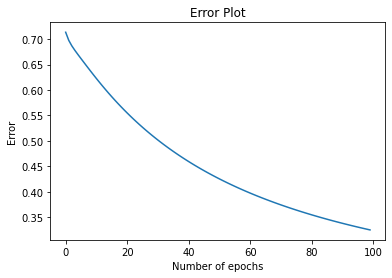

In [ ]:
train(X, y, epochs, learnrate, True)

## Predicting Student Admissions with Neural Networks
In this section, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

### Loading the data

In [ ]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-neural-networks/student-admissions/student_data.csv')

# Printing out the first 10 rows of our data
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

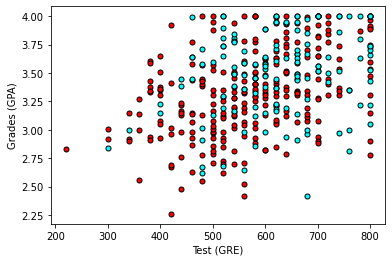

In [ ]:
# %matplotlib inline
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

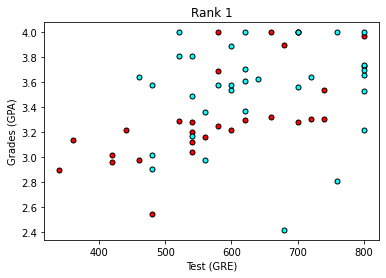

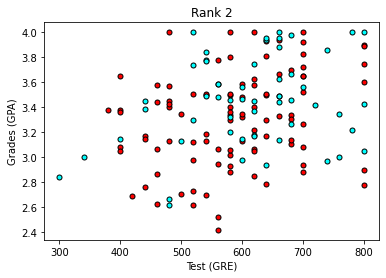

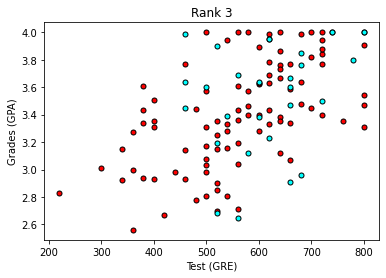

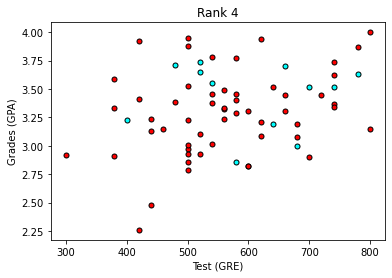

In [ ]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

### One-hot encoding the rank
Use the `get_dummies` function in pandas in order to one-hot encode the data.

Hint: To drop a column, it's suggested that you use `one_hot_data`[.drop( )](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html).

In [ ]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


### Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [ ]:
# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


### Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [ ]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
99       0  0.500  0.8275       0       0       1       0
194      1  0.750  0.8675       0       1       0       0
61       0  0.700  0.8300       0       0       0       1
302      1  0.500  0.7875       0       1       0       0
394      1  0.575  0.9975       0       0       1       0
62       0  0.800  0.9175       0       0       1       0
345      0  0.625  0.7575       0       0       1       0
344      0  0.650  0.8375       0       0       1       0
68       0  0.725  0.9225       1       0       0       0
314      0  0.675  0.8650       0       0       0       1
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
5       1  0.950  0.7500       0       1       0       0
13      0  0.875  0.7700       0       1       0       0
23      0  0.850  0.7975       0       0       0       1
26      1  0.775  0.9025       1       0       0       0
30      0  

### Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [ ]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
99   0.500  0.8275       0       0       1       0
194  0.750  0.8675       0       1       0       0
61   0.700  0.8300       0       0       0       1
302  0.500  0.7875       0       1       0       0
394  0.575  0.9975       0       0       1       0
62   0.800  0.9175       0       0       1       0
345  0.625  0.7575       0       0       1       0
344  0.650  0.8375       0       0       1       0
68   0.725  0.9225       1       0       0       0
314  0.675  0.8650       0       0       0       1
99     0
194    1
61     0
302    1
394    1
62     0
345    0
344    0
68     0
314    0
Name: admit, dtype: int64


### Training the 1-layer Neural Network
The following function trains the 1-layer neural network.  
First, we'll write some helper functions.

In [ ]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
    
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

### Backpropagate the error
Now it's your turn to shine. Write the error term. Remember that this is given by the equation $$ (y-\hat{y})x $$ for binary cross entropy loss function and 
$$ (y-\hat{y})\sigma'(x)x $$ for mean square error. 

In [ ]:
def error_term_formula(x, y, output):
#    for binary cross entropy loss
    return (y - output)*x
#    for mean square error
#    return (y - output)*sigmoid_prime(x)*x

In [ ]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.0001

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term

        # Update the weights here. The learning rate times the 
        # change in weights
        # don't have to divide by n_records since it is compensated by the learning rate
        weights += learnrate * del_w #/ n_records  

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean(error_formula(targets, out))
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.7554101695287188
Epoch: 100
Train loss:  0.6257618907012589
Epoch: 200
Train loss:  0.6138277106962134
Epoch: 300
Train loss:  0.6106428180453167
Epoch: 400
Train loss:  0.6086718721854811
Epoch: 500
Train loss:  0.607187860874402
Epoch: 600
Train loss:  0.606032020277616
Epoch: 700
Train loss:  0.6051189345648322
Epoch: 800
Train loss:  0.6043881919205627
Epoch: 900
Train loss:  0.6037952479383182
Finished training!


### Calculating the Accuracy on the Test Data

In [ ]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.625


## Vision model on CIFAR image dataset

You’ll build a deep learning model and train the model using a common training loop structure. Then, you’ll test your model’s performance and tweak hyperparameters to improve your results and training speed. Finally, we’ll explore ways to deploy your model to prototype systems or production.

First, we load this data and convert it to numeric values in the form of tensors. The tensors will act as inputs during the model training stage; however, before they are passed in, the tensors are usually preprocessed via transforms and grouped into batches for better training performance. Thus, the data preparation stage takes generic data and converts it to batches of tensors that can be passed into your NN model.

Next, in the model experimentation and development stage, we will design an NN model, train the model with our training data, test its performance, and optimize our hyperparameters to improve performance to a desired level. To do so, we will separate our dataset into three parts: one for training, one for validation, and one for testing. We’ll design an NN model and train its parameters with our training data. PyTorch provides elegantly designed modules and classes in the torch.nn module to help you create and train your NNs. We will define a loss function and optimizer from a selection of the many built-in PyTorch functions. Then we’ll perform backpropagation and update the model parameters in our training loop.

Within each epoch, we’ll also validate our model by passing in validation data, measuring performance, and potentially tuning hyperparameters. Finally, we’ll test our model by passing in test data and measuring the model’s performance against unseen data. In practice, validation and test loops may be optional, but we show them here for completeness.

The last stage of deep learning model development is the model deployment stage. In this stage, we have a fully trained model—so what do we do with it? If you are a deep learning research scientist conducting experiments, you may want to simply save the model to a file and load it for further research and experimentation, or you may want to provide access to it via a repository like PyTorch Hub. You may also want to deploy it to an edge device or local server to demonstrate a prototype or a proof of concept.

On the other hand, if you are a software developer or systems engineer, you may want to deploy your model to a product or service. In this case, you can deploy your model to a production environment on a cloud server or deploy it to an edge device or mobile phone. When deploying trained models, the model often requires additional postprocessing. For example, you may classify a batch of images, but you only want to report the most confident result. The model deployment stage also handles any postprocessing that is needed to go from your model’s output values to the final solution.

PyTorch provides powerful built-in classes and utilities, such as the Dataset, DataLoader, and Sampler classes, for loading various types of data. The Dataset class defines how to access and preprocess data from a file or data sources. The Sampler class defines how to sample data from a dataset in order to create batches, while the DataLoader class combines a dataset with a sampler and allows you to iterate over a set of batches.

In [ ]:
import torch
import torchvision

from torchvision.datasets import CIFAR10

In [ ]:
train_data = CIFAR10(root="./train/",
                    train=True, 
                    download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./train/cifar-10-python.tar.gz to ./train/


In [ ]:
print(train_data)
print(len(train_data))
print(train_data.data.shape)
print(len(train_data.targets))
print(train_data.classes)
print(train_data.class_to_idx)
print(type(train_data[0]))
print(len(train_data[0]))

data, label = train_data[0]
print(type(data))
print(data)
print(type(label))
print(label)
print(train_data.classes[label])

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
50000
(50000, 32, 32, 3)
50000
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
<class 'tuple'>
2
<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x7F2B561C1810>
<class 'int'>
6
frog


In [ ]:
test_data = CIFAR10(root="./test/", 
                    train=False, 
                    download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./test/cifar-10-python.tar.gz to ./test/


In [ ]:
print(test_data)
print(len(test_data))
print(test_data.data.shape)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
10000
(10000, 32, 32, 3)


In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root="./train/",
                    train=True, 
                    download=True,
                    transform=train_transforms)

print(train_data)
print(train_data.transforms)

data, label = train_data[0]
print(type(data))
print(data.size())
print(data)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
<class 'torch.Tensor'>
torch.Size([3, 32, 32])
tensor([[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         ...,
         [-2.4291, -2.4291, -2.4291,  ...,  0.2073,  0.0328, -0.0835],
      

In [ ]:
test_transforms = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

test_data = torchvision.datasets.CIFAR10(
      root="./test/", 
      train=False, 
      transform=test_transforms)

print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


Now that we have defined the transforms and created the datasets, we can access data samples one at a time. However, when you train your model, you will want to pass in small batches of data at each iteration. Sending data in batches not only allows more efficient training but also takes advantage of the parallel nature of GPUs to accelerate training.

Batch processing can easily be implemented using the torch.utils.data.DataLoader class. Let’s start with an example of how Torchvision uses this class, and then we’ll cover it in more detail.

In [ ]:
trainloader = torch.utils.data.DataLoader(
                    train_data,
                    batch_size=16,
                    shuffle=True)

In [ ]:
testloader = torch.utils.data.DataLoader(
                    test_data,
                    batch_size=16,
                    shuffle=False)

The dataloader object combines a dataset and a sampler, and provides an iterable over the given dataset. In other words, your training loop can use this object to sample your dataset and apply transforms one batch at a time instead of applying them for the complete dataset at once. This considerably improves efficiency and speed when training and testing models.

The following code shows how to retrieve a batch of samples from the trainloader:

In [ ]:
data_batch, labels_batch = next(iter(trainloader))

print(data_batch.size())
print(labels_batch.size())

torch.Size([16, 3, 32, 32])
torch.Size([16])


We need to use iter() to cast the trainloader to an iterator and then use next() to iterate over the data one more time. This is only necessary when accessing one batch. As we’ll see later, our training loops will access the dataloader directly without the need for iter() and next(). After checking the sizes of the data and labels, we see they return batches of size 16.

So far, I’ve shown you how to load, transform, and batch image data using Torchvision. However, you can use PyTorch to prepare other types of data as well. PyTorch libraries such as Torchtext and Torchaudio provide dataset and dataloader classes for text and audio data, and new external libraries are being developed all the time.

PyTorch also provides a submodule called torch.utils.data that you can use to create your own dataset and dataloader classes like the ones you saw in Torchvision. It consists of Dataset, Sampler, and DataLoader classes.

PyTorch supports map- and iterable-style dataset classes. A map-style dataset is derived from the abstract class torch.utils.data.Dataset. It implements the getitem() and len() functions, and represents a map from (possibly nonintegral) indices/keys to data samples. For example, such a dataset, when accessed with dataset[idx], could read the idx-th image and its corresponding label from a folder on the disk. Map-style datasets are more commonly used than iterable-style datasets, and all datasets that represent a map made from keys or data samples should use this subclass.

All subclasses should overwrite getitem(), which fetches a data sample for a given key. Subclasses can also optionally overwrite len(), which returns the size of the dataset by many Sampler implementations and the default options of DataLoader.

An iterable-style dataset, on the other hand, is derived from the torch.utils.data.IterableDataset abstract class. It implements the iter() protocol and represents an iterable over data samples. This type of dataset is typically used when reading data from a database or a remote server, as well as data generated in real time. Iterable datasets are useful when random reads are expensive or uncertain, and when the batch size depends on fetched data.

In addition to dataset classes PyTorch also provides sampler classes, which offer a way to iterate over indices of dataset samples. Sampler are derived from the torch.utils.data.Sampler base class.

Every Sampler subclass needs to implement an iter() method to provide a way to iterate over indices of dataset elements and a len() method that returns the length of the returned iterators.

The dataset and sampler objects are not iterables, meaning you cannot run a for loop on them. The dataloader object solves this problem. The Dataset class returns a dataset object that includes data and information about the data. The Sampler class returns the actual data itself in a specified or random fashion. The DataLoader class combines a dataset with a sampler and returns an iterable.

One of the most powerful features of PyTorch is its Python module torch.nn, which makes it easy to design and experiment with new models. The following code illustrates how you can create a simple model with torch.nn. In this example, we will create a fully connected model called SimpleNet. It consists of an input layer, a hidden layer, and an output layer that takes in 2,048 input values and returns 2 output values for classification:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2048, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64,2)

    def forward(self, x):
        x = x.view(-1, 2048)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return x

In [ ]:
simplenet = SimpleNet()
print(simplenet)

SimpleNet(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


This simple model demonstrates the following decisions you need to make during model design:
1. **Module definition**: How will you define the layers of your NN? How will you combine these layers into building blocks? In the example, we chose three linear or fully connected layers.
2. **Activation functions**: Which activation functions will you use at the end of each layer or module? In the example, we chose to use relu activation for the input and hidden layers and softmax for the output layer.
3. **Module connections**: How will your modules be connected to each other? In the example, we chose to simply connect each linear layer in sequence.
4. **Output selection**: What output values and formats will be returned? In this example, we return two values from the softmax() function.

The next step in model development is to train your model with your training data. Training a model involves nothing more than estimating the model’s parameters, passing in data, and adjusting the parameters to achieve a more accurate representation of how the data is generally modeled.

In other words, you set the parameters to some values, pass through data, and then compare the model’s outputs with true outputs to measure the error. The goal is to change the parameters and repeat the process until the error is minimized and the model’s outputs are the same as the true outputs.

In this example, we will train the LeNet5 model with the CIFAR-10 dataset that we used earlier in this chapter. The LeNet5 model is a simple convolutional NN developed by Yann LeCun and his team at Bell Labs in the 1990s to classify hand-written digits. (Unbeknownst to me at the time, I actually worked for Bell Labs in the same building in Holmdel, NJ, while this work was being performed.)

In [ ]:
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # <1>
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNet5().to(device=device)

Next, we need to define the loss function (which is also called the criterion) and the optimizer algorithm. The loss function determines how we measure the performance of our model and computes the loss or error between predictions and truth. We’ll attempt to minimize the loss by adjusting the model parameters during training. The optimizer defines how we update our model’s parameters during training.

To define the loss function and the optimizer, we use the torch.optim and torch.nn packages as shown in the following code:

In [ ]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),
                      lr=0.001, 
                      momentum=0.9)

In [ ]:
N_EPOCHS = 10 
for epoch in range(N_EPOCHS): # <1>

    epoch_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.to(device) # <2>
        labels = labels.to(device)

        optimizer.zero_grad() # <3>

        outputs = model(inputs) # <4>
        loss = criterion(outputs, labels) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, 
                  epoch_loss/len(trainloader)))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0 Loss: 1.9107245240402222
Epoch: 1 Loss: 1.600426623764038
Epoch: 2 Loss: 1.4878545830726624
Epoch: 3 Loss: 1.3998275267791749
Epoch: 4 Loss: 1.339401881046295
Epoch: 5 Loss: 1.2818300464820862
Epoch: 6 Loss: 1.2469202939224242
Epoch: 7 Loss: 1.2177171779727936
Epoch: 8 Loss: 1.194690007867813
Epoch: 9 Loss: 1.1706352946281433


1. Outer training loop; loop over 10 epochs.
2. Move inputs and labels to GPU if available.
3. Zero out gradients before each backpropagation pass, or they’ll accumulate.
4. Perform forward pass.
5. Compute loss.
6. Perform backpropagation; compute gradients.
7. Adjust parameters based on gradients.
8. Accumulate batch loss so we can average over the epoch.

The training loop consists of two loops. In the outer loop, we will process the entire set of training data during every iteration or epoch. However, instead of waiting to process the entire dataset before updating the model’s parameters, we process smaller batches of data, one batch at a time. The inner loop loops over each batch.

> Warning: By default, PyTorch accumulates the gradients during each call to loss.backward() (i.e., the backward pass). This is convenient while training some types of NNs, such as RNNs; however, it is not desired for convolutional neural networks (CNNs). In most cases, you will need to call optimizer.zero_grad() to zero the gradients before doing backpropagation so the optimizer updates the model parameters correctly.

Now that we have trained our model and attempted to minimize the loss, how can we evaluate its performance? How do we know that our model will generalize and work with data it has never seen before?

Model development often includes validation and testing loops to ensure that overfitting does not occur and that the model will perform well against unseen data. Let’s address validation first. Here, I’ll provide you with a quick reference for how you can add validation to your training loops with PyTorch.

Typically, we will reserve a portion of the training data for validation. The validation data will not be used to train the NN; instead, we’ll use it to test the performance of the model at the end of each epoch.

Validation is good practice when training your models. It’s commonly performed when adjusting hyperparameters. For example, maybe we want to slow down the learning rate after five epochs.

Before we perform validation, we need to split our training dataset into a training dataset and a validation dataset. We use the random_split() function from torch.utils.data to reserve 10,000 of our 50,000 training images for validation. Once we create our train_set and val_set, we create our dataloaders for each one.

In [ ]:
from torch.utils.data import random_split

train_set, val_set = random_split(
                      train_data,
                      [40000, 10000])

trainloader = torch.utils.data.DataLoader(
                    train_set,
                    batch_size=16,
                    shuffle=True)

valloader = torch.utils.data.DataLoader(
                    val_set,
                    batch_size=16,
                    shuffle=True)

print(len(trainloader))
print(len(valloader))

2500
625


If the loss decreases for validation data, then the model is doing well. However, if the training loss decreases but the validation loss does not, then there’s a good chance the model is overfitting.

In [ ]:
from torch import optim
from torch import nn

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), 
                      lr=0.001, 
                      momentum=0.9)

N_EPOCHS = 10
for epoch in range(N_EPOCHS):

    # Training 
    train_loss = 0.0
    model.train() # <1>
    for inputs, labels in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    val_loss = 0.0
    model.eval() # <2>
    for inputs, labels in valloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        val_loss += loss.item()

    print("Epoch: {} Train Loss: {} Val Loss: {}".format(
                  epoch, 
                  train_loss/len(trainloader), 
                  val_loss/len(valloader)))

Epoch: 0 Train Loss: 1.9745660563468934 Val Loss: 1.7492280321121216
Epoch: 1 Train Loss: 1.6637929407119751 Val Loss: 1.5639272161483764
Epoch: 2 Train Loss: 1.5348106513500213 Val Loss: 1.4912440963745117
Epoch: 3 Train Loss: 1.4464851764440536 Val Loss: 1.385581601524353
Epoch: 4 Train Loss: 1.374079407954216 Val Loss: 1.4018443069458009
Epoch: 5 Train Loss: 1.316621362066269 Val Loss: 1.2531775268554688
Epoch: 6 Train Loss: 1.2859153034687043 Val Loss: 1.2561434190750123
Epoch: 7 Train Loss: 1.2512328678131104 Val Loss: 1.2327665576934814
Epoch: 8 Train Loss: 1.2264495978951455 Val Loss: 1.2291773901939391
Epoch: 9 Train Loss: 1.195324891924858 Val Loss: 1.1875609773635865


> Note: Running the .train() or .eval() method on your model object puts the model in training or testing mode, respectively. Calling these methods is only necessary if your model operates differently for training and evaluation. For example, dropout and batch normalization are used in training but not in validation or testing. It’s good practice to call .train() and .eval() in your loops.

As you can see, our model is training well and does not seem to be overfitting, since both the training loss and the validation loss are decreasing. If we train the model for more epochs, we may get even better results.

We’re not quite finished, though. Our model may still be overfitting. We might have just gotten lucky with our choice of hyperparameters, leading to good validation results. As a further test against overfitting, we will run some test data through our model.

The model has never seen the test data during training, nor has the test data had any influence on the hyperparameters. Let’s see how we perform against the test dataset.

In [ ]:
num_correct = 0.0

for x_test_batch, y_test_batch in testloader:
  model.eval()
  y_test_batch = y_test_batch.to(device)
  x_test_batch = x_test_batch.to(device)
  y_pred_batch = model(x_test_batch)
  _, predicted = torch.max(y_pred_batch, 1)
  num_correct += (predicted == y_test_batch).float().sum()
  
accuracy = num_correct/(len(testloader)*testloader.batch_size) 

print(len(testloader), testloader.batch_size)

print("Test Accuracy: {}".format(accuracy))

625 16
Test Accuracy: 0.6157000064849854


> Tip: You now know how to create training, validation, and test loops using PyTorch. Feel free to use this code as a reference when creating your own loops.

Now that you have a fully trained model, let’s explore what you can do with it in the model deployment stage. One of the simplest things you can do is save your trained model for future use. When you want to run your model against new inputs, you can simply load it and call the model with the new values.

The following code illustrates the recommended way to save and load a trained model. It uses the state_dict() method, which creates a dictionary object that maps each layer to its parameter tensor. In other words, we only need to save the model’s learned parameters. We already have the model’s design defined in our model class, so we don’t need to save the architecture. When we load the model, we use the constructor to create a “blank model,” and then we use load_state_dict() to set the parameters for each layer:

In [ ]:
torch.save(model.state_dict(), "./lenet5_model.pt")

model = LeNet5().to(device)
model.load_state_dict(torch.load("./lenet5_model.pt"))

<All keys matched successfully>

> Note: A common PyTorch convention is to save models using either a .pt or .pth file extension.